#Cardiovascular Disease Prediction
##Nur Alam
##ID-1189508

In [42]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as splt
import seaborn

### Loading Dataset

In [43]:
dataframe = pd.read_csv('/cardio_train.csv')
dataframe

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [44]:
dataframe.shape

(70000, 13)

In [45]:
dataframe.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#Exploratory Data Analysis (EDA)

In [46]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [47]:
#identifying important statistics for each feature
dataframe.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
#Checking null value
print(dataframe.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [49]:
#Checking duplicate values
print(f"Number of duplicate rows: {dataframe.duplicated().sum()}")

Number of duplicate rows: 0


###data transformation

In [50]:
#LabelEncoding for ‘gender’ attribute:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
dataframe['gender']=le.fit_transform(dataframe['gender'])
dataframe['gender']

0        1
1        0
2        0
3        1
4        0
        ..
69995    1
69996    0
69997    1
69998    0
69999    0
Name: gender, Length: 70000, dtype: int64

In [51]:
# Convert ‘age’ from days to year
dataframe['age'] = (dataframe['age']/365).round(0)

In [52]:
dataframe['age']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age, Length: 70000, dtype: float64

In [53]:
#to balance the target variable
dataframe['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

In [54]:
 #id column is not vital for modeling, Removing id column
dataframe.drop('id', axis=1, inplace=True)

In [55]:
dataframe.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,1,168,62.0,110,80,1,1,0,0,1,0
1,55.0,0,156,85.0,140,90,3,1,0,0,1,1
2,52.0,0,165,64.0,130,70,3,1,0,0,0,1
3,48.0,1,169,82.0,150,100,1,1,0,0,1,1
4,48.0,0,156,56.0,100,60,1,1,0,0,0,0


In [56]:
#Showing statistics for each variable
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.338686,6.765294,30.0,48.0,54.0,58.0,65.0
gender,70000.0,0.349571,0.476838,0.0,0.0,0.0,1.0,1.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


###Removing Outlier

In [57]:
df = dataframe

In [58]:
#Removing Outlier for features (Height, weight, ap_hi, ap_lo) that fall below 2.5% or above 97.5% of a given range
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True) #systolic blood pressure
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True) #diastolic blood pressure values

df.groupby('gender')['height'].mean() #it seems like,on average, men are taller than women
df.groupby('gender')['alco'].sum() #also, on average, men drink more than women

gender
0     973
1    2147
Name: alco, dtype: int64

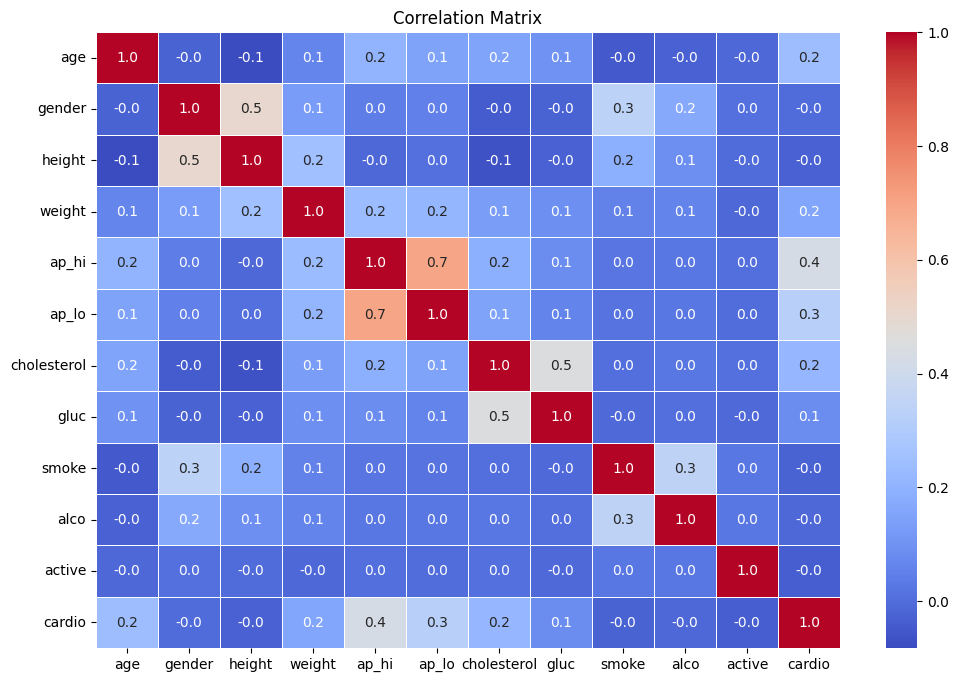

In [59]:
#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidth=.5, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

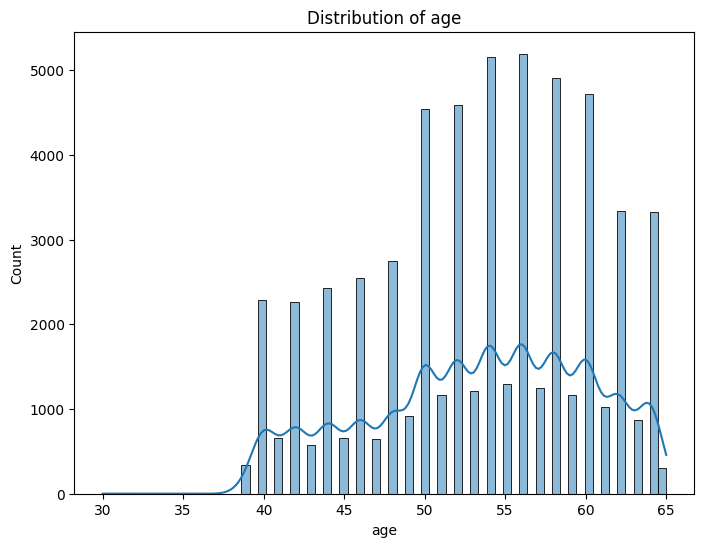

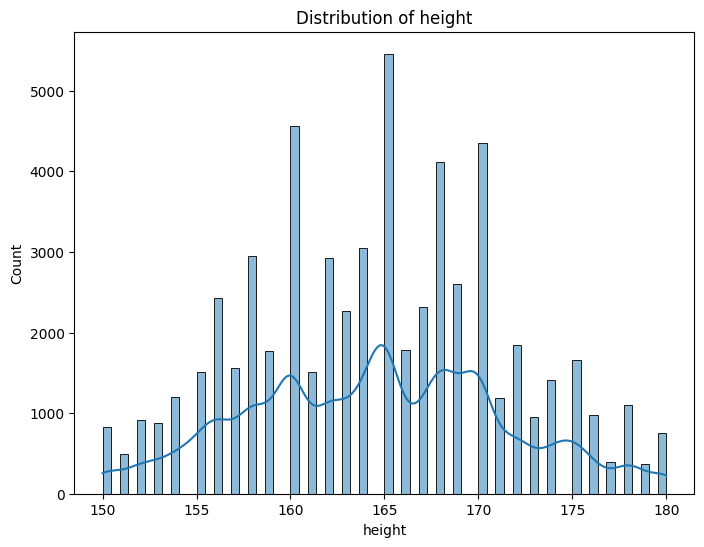

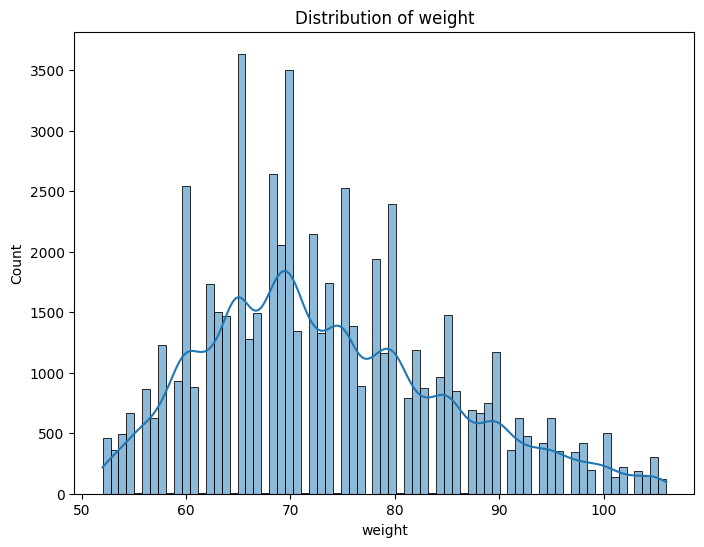

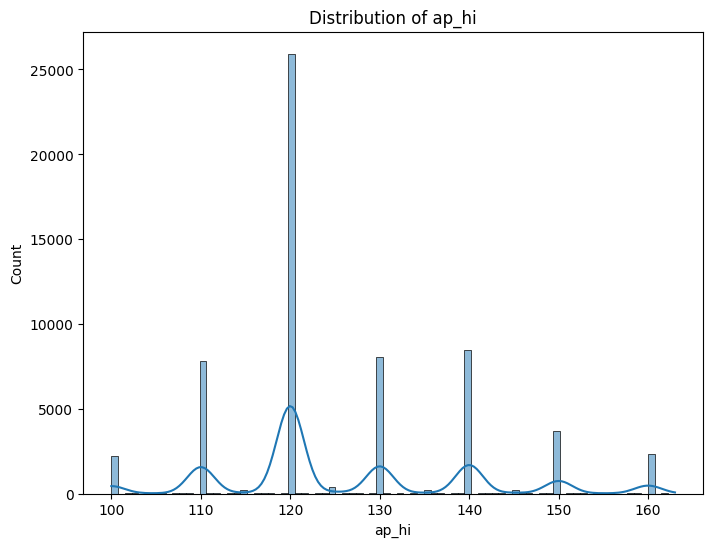

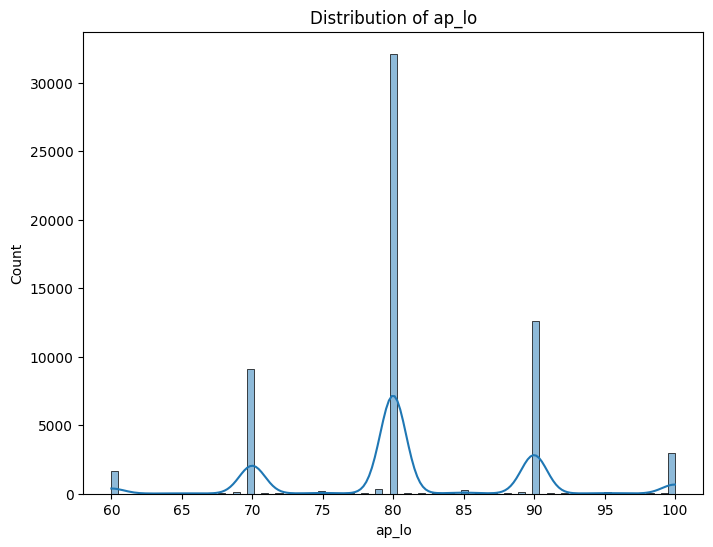

In [60]:
#Creating histograms for numerical features

numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

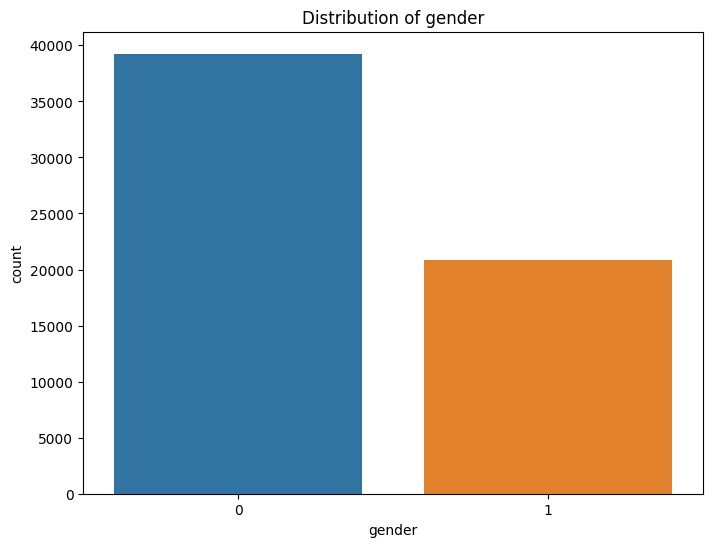

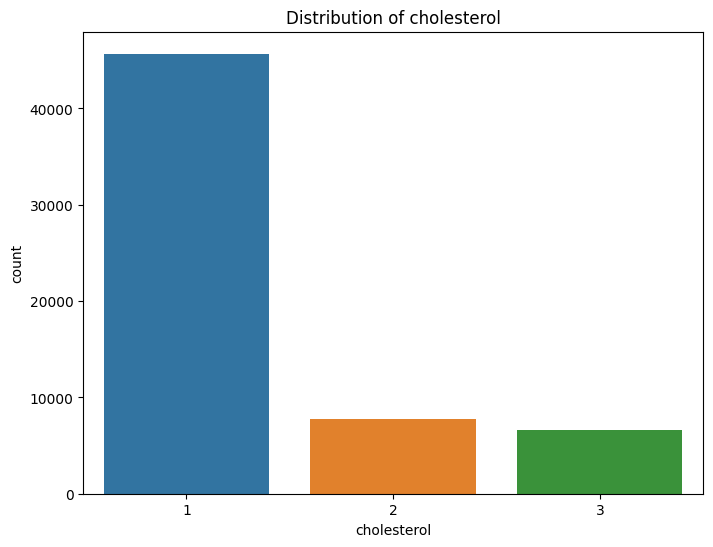

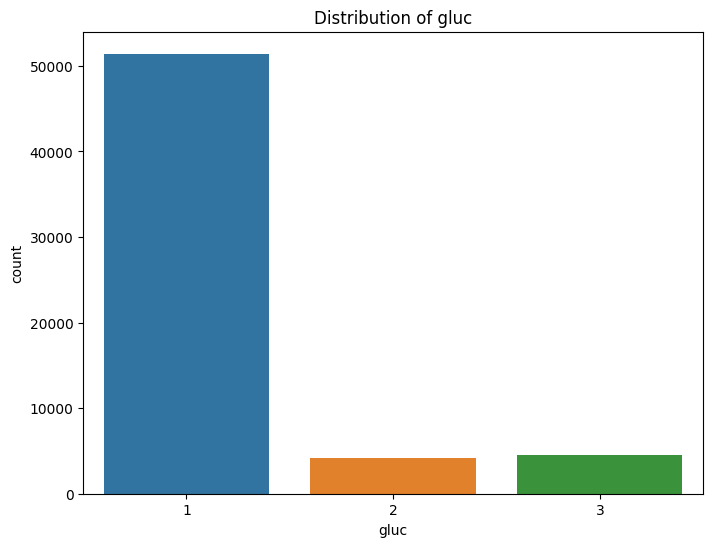

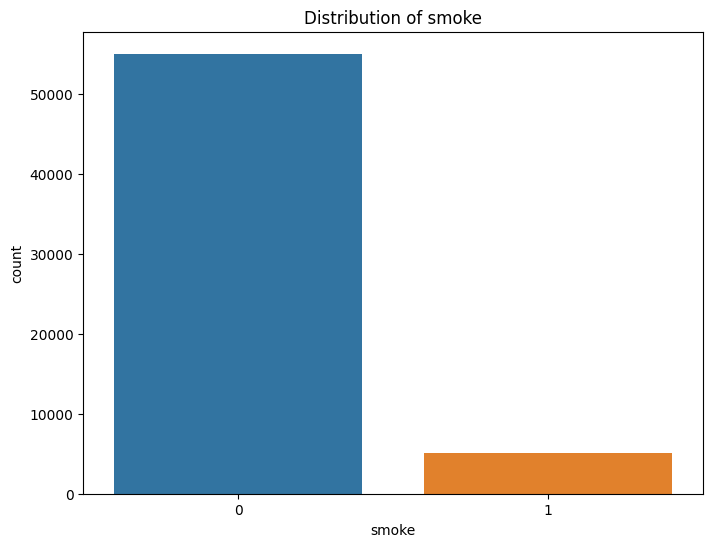

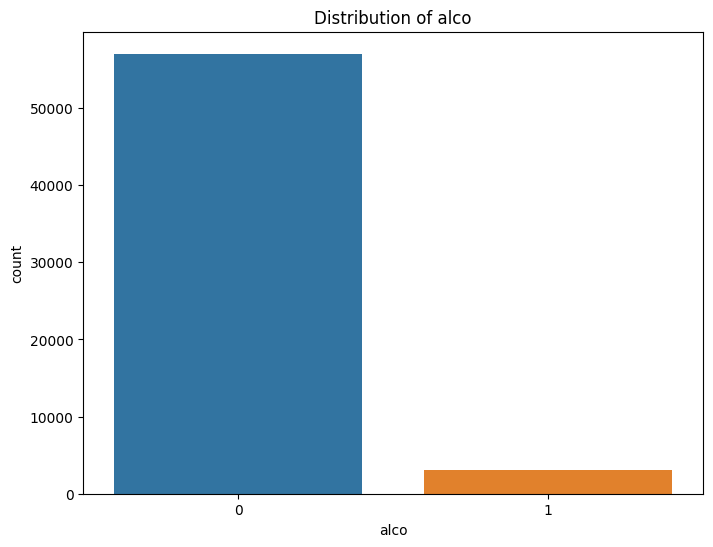

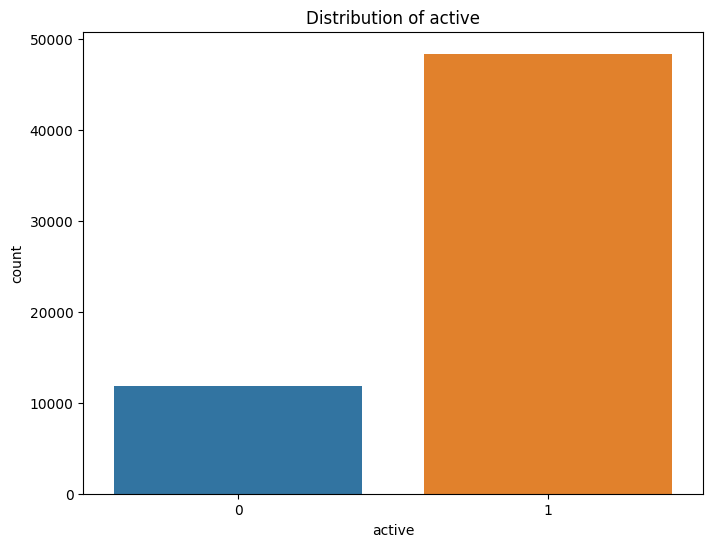

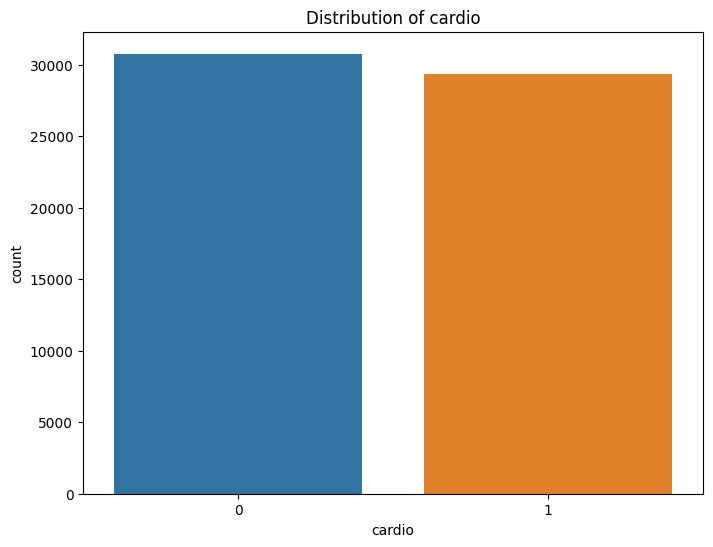

In [61]:
#Creating count plots for categorical features
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

###Feature Extraction

In [62]:
# Splitting dataset into two variables x (independent variable) and y (dependent/target variable)
x= df.iloc[:,:-1]
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.0,1,168,62.0,110,80,1,1,0,0,1
1,55.0,0,156,85.0,140,90,3,1,0,0,1
2,52.0,0,165,64.0,130,70,3,1,0,0,0
3,48.0,1,169,82.0,150,100,1,1,0,0,1
4,48.0,0,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69993,54.0,0,172,70.0,130,90,1,1,0,0,1
69994,58.0,0,165,80.0,150,80,1,1,0,0,1
69995,53.0,1,168,76.0,120,80,1,1,1,0,1
69998,61.0,0,163,72.0,135,80,1,2,0,0,0


In [63]:
y= df.iloc[:,11]       # target variable y=”cardio”
y

0        0
1        1
2        1
3        1
4        0
        ..
69993    1
69994    1
69995    0
69998    1
69999    0
Name: cardio, Length: 60142, dtype: int64

In [64]:
#Creating new feature(bmi)
# "Body Mass Index(bmi)", a measure of body fat based on a person's weight and heigh
x["bmi"] = x["weight"] *10000 / ((x["height"])**2)

In [65]:
conditions = [
    (x["bmi"] <= 15),                           # 0 - Anorexic
    (x["bmi"] > 15) & (x["bmi"] <= 18.5),       # 1 - Underweight
    (x["bmi"] > 18.5) & (x["bmi"] <= 25),       # 2 - Normal weight
    (x["bmi"] > 25) & (x["bmi"] <= 30),         # 3 - Overweight
    (x["bmi"] > 30) & (x["bmi"] <= 35),         # 4 - Obesity Class I
    (x["bmi"] > 35) & (x["bmi"] <= 40),         # 5 - Obesity Class II
    (x["bmi"] > 40)                             # 6 - Obesity Class III
]

bmi_class = [0, 1, 2, 3, 4, 5, 6]

#Creating new feature(bmi_class)
x["bmi_class"] = np.select(conditions, bmi_class)

In [66]:
#define categorize_blood_pressure function according to following condition
def categorize_blood_pressure(x):
    systolic = x['ap_hi']
    diastolic = x['ap_lo']

    if systolic < 120 and diastolic < 80:
        return 0
    elif systolic < 130 and diastolic < 85:
        return 1
    elif (systolic >= 130 and systolic <= 139) or (diastolic >= 85 and diastolic <= 89):
        return 2
    elif (systolic >= 140 and systolic <= 159) or (diastolic >= 90 and diastolic <= 99):
        return 3
    elif (systolic >= 160 and systolic <= 179) or (diastolic >= 100 and diastolic <= 109):
        return 4
    elif systolic >= 180 or diastolic >= 110:
        return 5
    elif systolic >= 140 and systolic <= 160 and diastolic < 90:
        return 6
    elif systolic > 160 and diastolic < 90:
        return 7
    else:
        return -1  #for observations that don't meet any conditions, perhaps for error checking or review.

#Creating new feature(bp_cat) for categorize blood pressure
x['bp_cat'] = x.apply(categorize_blood_pressure, axis=1)

In [67]:
#Creating new feature (pulse pressure) difference of systolic and diastolic blood pressure
x["pulse_press"] = x["ap_hi"] - x["ap_lo"]

In [68]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_class,bp_cat,pulse_press
0,50.0,1,168,62.0,110,80,1,1,0,0,1,21.967120,2,1,30
1,55.0,0,156,85.0,140,90,3,1,0,0,1,34.927679,4,3,50
2,52.0,0,165,64.0,130,70,3,1,0,0,0,23.507805,2,2,60
3,48.0,1,169,82.0,150,100,1,1,0,0,1,28.710479,3,3,50
4,48.0,0,156,56.0,100,60,1,1,0,0,0,23.011177,2,0,40


In [69]:
x.shape

(60142, 15)

In [70]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
age,60142.0,53.338798,6.746864,30.000000,48.000000,54.000000,58.000000,65.000000
gender,60142.0,0.347311,0.476120,0.000000,0.000000,0.000000,1.000000,1.000000
height,60142.0,164.554854,6.830174,150.000000,160.000000,165.000000,169.000000,180.000000
weight,60142.0,73.426805,11.614806,52.000000,65.000000,72.000000,80.000000,106.000000
ap_hi,60142.0,125.770526,13.761847,100.000000,120.000000,120.000000,135.000000,163.000000
ap_lo,60142.0,81.046307,8.239157,60.000000,80.000000,80.000000,90.000000,100.000000
cholesterol,60142.0,1.350953,0.670076,1.000000,1.000000,1.000000,1.000000,3.000000
gluc,60142.0,1.220229,0.567607,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,60142.0,0.085631,0.279820,0.000000,0.000000,0.000000,0.000000,1.000000
alco,60142.0,0.051877,0.221781,0.000000,0.000000,0.000000,0.000000,1.000000


##Dimensionality Reduction (PCA)

In [71]:
#importing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [72]:
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [73]:
scaled_data=scaler.transform(x)

In [74]:
scaled_data

array([[-0.4948708 ,  1.37086134,  0.50440517, ..., -1.00550308,
        -0.54193969, -1.47604373],
       [ 0.24622042, -0.72946838, -1.25251926, ...,  1.15718079,
         1.34288534,  0.52887578],
       [-0.19843432, -0.72946838,  0.06517406, ..., -1.00550308,
         0.40047283,  1.53133553],
       ...,
       [-0.05021607,  1.37086134,  0.50440517, ...,  0.07583885,
        -0.54193969, -0.47358398],
       [ 1.13552988, -0.72946838, -0.22764668, ...,  0.07583885,
         0.40047283,  1.03010565],
       [ 0.39443866, -0.72946838,  0.79722591, ..., -1.00550308,
        -0.54193969, -0.47358398]])

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca=PCA(n_components=2)

In [77]:
pca.fit(scaled_data)

PCA(n_components=2)

In [78]:
x_pca=pca.transform(scaled_data)

In [79]:
scaled_data.shape

(60142, 15)

In [80]:
x_pca.shape

(60142, 2)

In [81]:
scaled_data

array([[-0.4948708 ,  1.37086134,  0.50440517, ..., -1.00550308,
        -0.54193969, -1.47604373],
       [ 0.24622042, -0.72946838, -1.25251926, ...,  1.15718079,
         1.34288534,  0.52887578],
       [-0.19843432, -0.72946838,  0.06517406, ..., -1.00550308,
         0.40047283,  1.53133553],
       ...,
       [-0.05021607,  1.37086134,  0.50440517, ...,  0.07583885,
        -0.54193969, -0.47358398],
       [ 1.13552988, -0.72946838, -0.22764668, ...,  0.07583885,
         0.40047283,  1.03010565],
       [ 0.39443866, -0.72946838,  0.79722591, ..., -1.00550308,
        -0.54193969, -0.47358398]])

In [82]:
x_pca

array([[-2.59006445, -0.69125788],
       [ 3.41061993,  0.98387072],
       [-0.24903917, -1.07538338],
       ...,
       [-0.69221885, -0.46690596],
       [ 0.95049556, -0.27516965],
       [-1.03639989, -0.19752778]])

Text(0, 0.5, 'Second principle component')

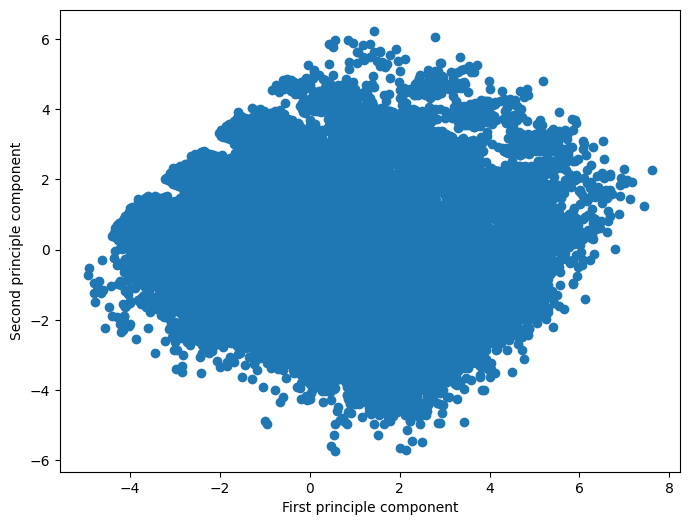

In [83]:

%matplotlib inline
plt.figure(figsize=(8,6))
#plt.scatter(x_pca[:,0],x_pca[:,1], c=dataframe['cardio'], cmap='plasma')
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

#Model Evaluation using Supervised Machine Learning Algorithm

In [84]:
#Splitting dataset into train data (80%) and test data (20%)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pca,y, test_size= 0.20, random_state=1)

In [85]:
xtrain

array([[-0.78459579, -1.15953057],
       [ 0.51375364, -2.26975434],
       [ 1.23211671, -0.62823478],
       ...,
       [ 2.57762369, -0.3584914 ],
       [ 2.56932669, -0.33773728],
       [ 2.28755421,  0.52525973]])

In [86]:
ytrain

20655    1
19236    1
67045    1
69703    0
39826    0
        ..
58180    0
37785    0
6060     1
14124    1
38356    0
Name: cardio, Length: 48113, dtype: int64

##Train and Accuracy test using RandomForestClassifier

In [87]:
xtrain.shape

(48113, 2)

In [88]:
ytrain.shape

(48113,)

In [89]:
# Train model with train data using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=50)      #given n_estimators = 50
RFCmodel.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=50)

In [90]:
# checking model accuracy with test data (xtest, ytest)
RFCmodel.score(xtest, ytest)

0.6624823343586334

In [92]:
y_predicted = RFCmodel.predict(xtest)

In [93]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predicted))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      6220
           1       0.66      0.63      0.64      5809

    accuracy                           0.66     12029
   macro avg       0.66      0.66      0.66     12029
weighted avg       0.66      0.66      0.66     12029



##Train and Accuracy test using DecisionTreeClassifier

In [94]:
from sklearn.tree import DecisionTreeClassifier
DTCmodel = DecisionTreeClassifier()
DTCmodel.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [95]:
DTCmodel.score(xtest, ytest)

0.6206667220882867

In [96]:
y_predicted = DTCmodel.predict(xtest)

In [97]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predicted))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6220
           1       0.61      0.59      0.60      5809

    accuracy                           0.62     12029
   macro avg       0.62      0.62      0.62     12029
weighted avg       0.62      0.62      0.62     12029



##Train and Accuracy test using K-nearest neighbour(KNN)

In [98]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors=7, weights='uniform', p=1)

In [99]:
KNNmodel.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7, p=1)

In [100]:
KNNmodel.score(xtest, ytest)

0.6825172499792169

In [101]:
y_predicted = KNNmodel.predict(xtest)

In [102]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predicted))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      6220
           1       0.68      0.64      0.66      5809

    accuracy                           0.68     12029
   macro avg       0.68      0.68      0.68     12029
weighted avg       0.68      0.68      0.68     12029



##Train and Accuracy test using Support Vectore machine

In [103]:
from sklearn.svm import LinearSVC
LSVCmodel = LinearSVC (C=0.1, random_state=42, max_iter=8000, tol=1e-8)

In [104]:
LSVCmodel.fit(xtrain, ytrain)

LinearSVC(C=0.1, max_iter=8000, random_state=42, tol=1e-08)

In [105]:
accuracy_score=LSVCmodel.score(xtest, ytest)
accuracy_score

0.7106160113060105

In [106]:
y_predicted_svm = LSVCmodel.predict(xtest)

In [107]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predicted_svm))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6220
           1       0.74      0.62      0.67      5809

    accuracy                           0.71     12029
   macro avg       0.72      0.71      0.71     12029
weighted avg       0.71      0.71      0.71     12029



##Evaluation Metric

#### We are using svm score to evaluate matrix, roc carve, confusion matrix, classification report, Because we got highest accuracy (71%) for support vector machine

In [108]:
#1.Accuracy
accuracy = round(accuracy_score, 4)
print(f'The accuracy of the Support Vector Classifier is: {accuracy}')

The accuracy of the Support Vector Classifier is: 0.7106


In [109]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_predicted_svm)
cm

array([[4960, 1260],
       [2221, 3588]])

In [110]:
print(f'The Confusion Matrix of the Support Vector Classifier is: {cm}')

The Confusion Matrix of the Support Vector Classifier is: [[4960 1260]
 [2221 3588]]


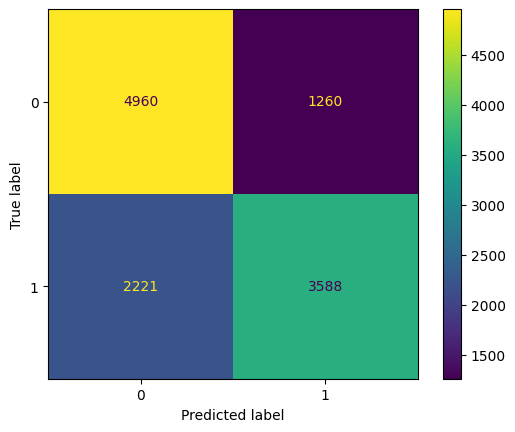

In [111]:
#Displaying confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

,0,1,accuracy,macro avg,weighted avg
precision,0.690712,0.740099,0.710616,0.715405,0.714562
recall,0.797428,0.617662,0.710616,0.707545,0.710616
f1-score,0.740243,0.673360,0.710616,0.706802,0.707944
support,6220.000000,5809.000000,0.710616,12029.000000,12029.000000


<Axes: >

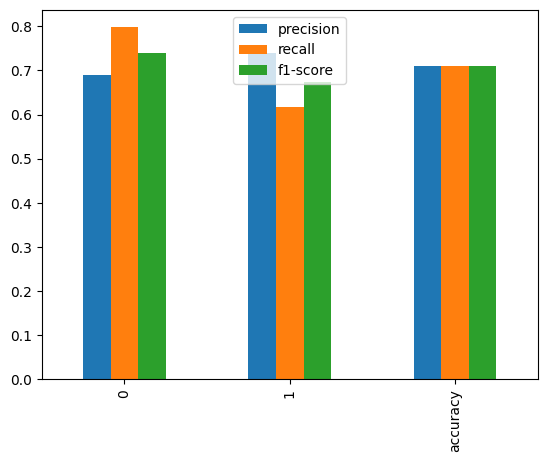

In [112]:
#Classification report
from sklearn.metrics import classification_report
from IPython.display import display

evaluation = classification_report(ytest, y_predicted_svm, digits=4, output_dict=True)
# Display the evaluation results using the display function
display(pd.DataFrame(evaluation))
df = pd.DataFrame(evaluation)
df.iloc[:3, :3].T.plot(kind='bar')

##Feature Engineering (Feature selection)

In [113]:
dataframe = pd.read_csv('/cardio_train.csv')
dataframe

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [114]:
x= dataframe.iloc[:,:-1]
y= dataframe.iloc[:,12]

In [115]:
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
Fit_features = SelectKBest(score_func=f_classif)
Fit_features.fit(x,y)
SCORE_COL=pd.DataFrame(Fit_features.scores_,columns=['score value'])
NAME_COL=pd.DataFrame(x.columns, columns=['attribute name'])
top_features = pd.concat([NAME_COL, SCORE_COL], axis=1)
top_features.nlargest(8, 'score value')

,attribute name,score value
1,age,4209.007957
7,cholesterol,3599.361137
4,weight,2388.777887
8,gluc,562.772977
6,ap_lo,303.629011
5,ap_hi,208.339524
11,active,89.091494
9,smoke,16.790541


<Axes: >

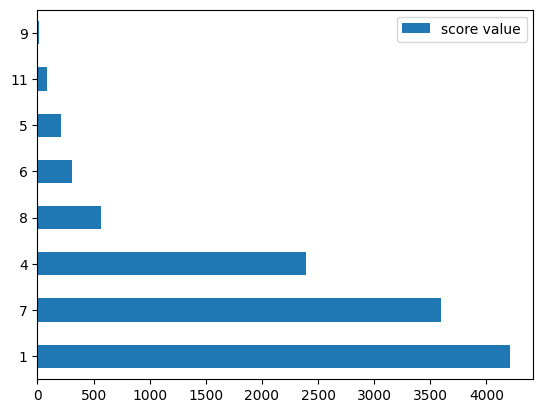

In [116]:
top_features.nlargest(8, 'score value').plot(kind = 'barh')

In [117]:
# Drop multiple columns by Name
dataframe.drop(["id","gender", "height", "alco"], axis = 1, inplace=True)

In [118]:
dataframe.head(5)

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,cardio
0,18393,62.0,110,80,1,1,0,1,0
1,20228,85.0,140,90,3,1,0,1,1
2,18857,64.0,130,70,3,1,0,0,1
3,17623,82.0,150,100,1,1,0,1,1
4,17474,56.0,100,60,1,1,0,0,0


In [119]:
x= dataframe.iloc[:,:-1]
x

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
0,18393,62.0,110,80,1,1,0,1
1,20228,85.0,140,90,3,1,0,1
2,18857,64.0,130,70,3,1,0,0
3,17623,82.0,150,100,1,1,0,1
4,17474,56.0,100,60,1,1,0,0
...,...,...,...,...,...,...,...,...
69995,19240,76.0,120,80,1,1,1,1
69996,22601,126.0,140,90,2,2,0,1
69997,19066,105.0,180,90,3,1,0,0
69998,22431,72.0,135,80,1,2,0,0


In [120]:
y= dataframe.iloc[:,8]       # target variable y=”cardio”
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [121]:
# Splitting dataset into train data (80%) and test data (20%)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.20, random_state=1)

In [122]:
#Train model with train data and Accuracy test using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFCmodel2 = RandomForestClassifier(n_estimators=50)      #given n_estimators = 50
RFCmodel2.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=50)

In [123]:
RFCmodel2.score(xtest, ytest)

0.6892142857142857

In [124]:
#Train model with train data and Accuracy test using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
KNNmodel2 = KNeighborsClassifier(n_neighbors=7, weights='uniform', p=1)

In [125]:
KNNmodel2.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7, p=1)

In [126]:
KNNmodel2.score(xtest, ytest)

0.6940714285714286

In [127]:
#Train model with train data and Accuracy test using DecissionTree classifier
from sklearn.tree import DecisionTreeClassifier
DTCmodel2 = DecisionTreeClassifier()
DTCmodel2.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [128]:
DTCmodel2.score(xtest, ytest)

0.6317142857142857

In [129]:
#Train model with train data and Accuracy test using Support Vector Machine
from sklearn.svm import LinearSVC
LSVCmodel2 = LinearSVC (C=0.1, random_state=42, max_iter=8000, tol=1e-8)
LSVCmodel2.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.1, max_iter=8000, random_state=42, tol=1e-08)

In [130]:
LSVCmodel2.score(xtest, ytest)

0.5059285714285714